In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('Crop_recommendation_csv.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [21]:
if (df['N'] > 90).all():
    print(df['N'])


In [22]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [23]:
x = df.drop('label', axis = 1)
y = df['label']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [47]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=20000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression:" ,logistic_acc)

Accuracy of logistic regression: 0.9818181818181818


In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(max_depth=15)
model_2.fit(x_train, y_train)

y_pred_2 = model_2.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of Decision Tree:" ,decision_acc)

Accuracy of Decision Tree: 0.9872727272727273


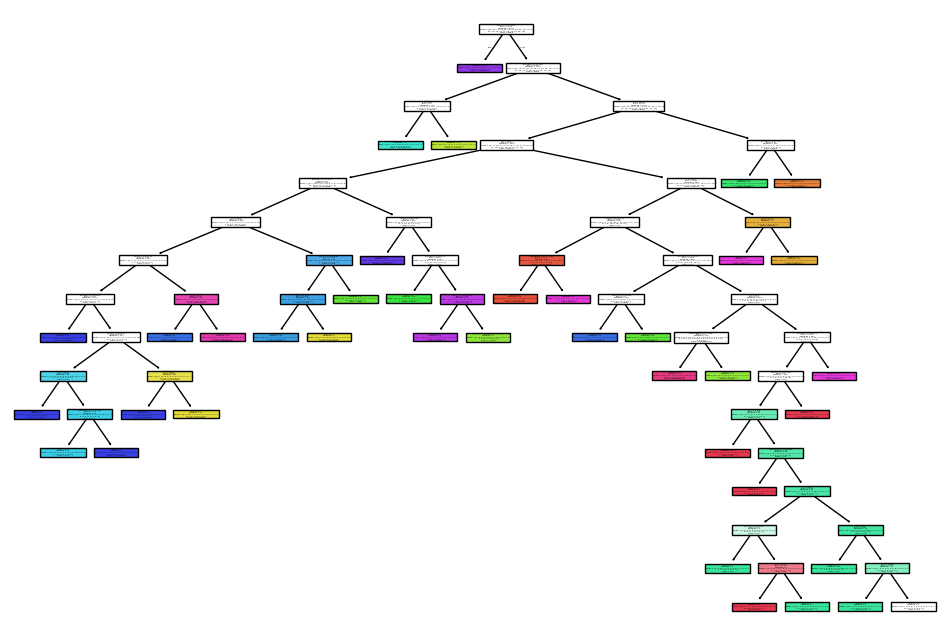

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_2,filled=True,feature_names=x.columns,class_names=model_2.classes_)  
plt.show()


In [51]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(x_train.values, y_train.values)

y_pred_3 = model_3.predict(x_test)
random_fore_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of Random Forest:" ,random_fore_acc)


Accuracy of Random Forest: 0.9963636363636363


C:\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [52]:
import joblib 
file_name = 'crop_app'
joblib.dump(model_3,'crop_app')

['crop_app']

In [54]:
app = joblib.load('crop_app')
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)
acc

array(['rice'], dtype=object)

In [55]:
# import pickle
# Pkl_Filename = "Pickle_RF_Model.pkl"  

In [56]:
# Pkl_Filename = "Pickle_RL_Model.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(model_4, file)

In [57]:
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_Model = pickle.load(file)

# Pickled_Model